In [1]:
using Plots, Interact, DifferentialEquations, BifurcationKit, Setfield, ForwardDiff
using NonLinearDynamicsCourse
import NonLinearDynamicsCourse as nld

WebIO._IJuliaInit()

# Bifurcaciones Globales en Flujos 2D. 

Como anticipamos cuando introducimos los flujos 2D, ademaás de ciclos límites y bifurcaciones de Hopf, la novedad que introducen los sistemas en el plano es la posibilidad de tener cambios cualitativos en el flujo que no pueden reducirse a lo que pasa en un entorno local de los puntos fijos, y se conoces como **bifurcaciones globales**.

Al no poder determinarse a partir del estudio de los autovalores del sistema linealizado, resultan más dificiles de detectar y caracterizar. Vamos a limitarnos a describirlas mediante ejemplos y limitarnos a las que dan origen a un ciclo límite: estas son 
- La **bifurcación homoclínica** o saddle-loop
- La bifurcación nodo silla sobre un ciclo límite **SNLC**, o saddle node heteroclínica, o saddle node de período infinito (SNIPER) o bifurcacion de Andronov. Es la misma bifurcación con distintos nombres (!)
- La bifurcación de nodo silla de órbitas periódicas 

Todas estas bifurcaciones están asociadas a la creación o destrucción de ciclos límites atractores o repulsores. Si a esta lista sumajmos la bifurcación local de Hopf tenemos de forma genérica cuatro formas diferentes de dar origen a auto oscilaciones en flujos 2D. Lo interesante es que cada una sigue diferentes "leyes de escala", cerca de la bifurcación. La ley de escala se refiere a como varían la amplitud y la frecuencia de oscilación en un entorno de la bifurcación. Para la Hopf ya vimos que la amplitud del ciclo límite crecía desde cero como la raiz cuadrada del parámetro y que aparecian con un período determinado por la parte imaginaria del autovalor.

## Bifurcacion Homoclínica

Vamos a considerar el siguiente sistema:

$\dot{x} = y$

$\dot{y} = \mu - x + x^2 - xy$

Los puntos fijos van a estar siempre en $y_*=0$ y en:

$x_*= \frac{1}{2} \pm \sqrt{\frac{1}{4}-\mu}$

siempre que $\mu<1/4$. En realidad este sistema como vamos a ver más adelante sufre varias bifurcaciones. Acá vamos a estar interesados sólo en $\mu<1/4$. En ese caso $\sqrt{1/4-\mu}$ va a ser siempre mayor a cero, por lo tanto vamos a tener puntos fijos en los siguientes intervalos.

$x^*_1= \frac{1}{2} - \sqrt{\frac{1}{4}-\mu} \quad$,$\quad x^*_1 < 1/2 $

$x^*_2= \frac{1}{2} + \sqrt{\frac{1}{4}-\mu} \quad$,$\quad x^*_2 > 1/2 $

El Jacobiano de forma general es:

$\begin{pmatrix}
0 & 1\\
2x-1-y & -x
\end{pmatrix}$

cuyo Determinante y Traza evaluados en los puntos fijos dan

$x^*_1$:$\quad \Delta=1-2x^*_1 > 0$,$\quad$ foco atractor/repulsor 

$x^*_2$:$\quad \Delta=1-2x^*_2 < 0$,$\quad$ punto silla

El único cambio de estabilidad ocurre para $x^*_1$ en $\mu=0$ y corresponde a una bifurcación de Hopf ya que en ese caso $x^*_1=0$ y la traza se anula (el determinante sigue siendo positivo). 

Sin embargo del estudio del retrato de fases emerge otro cambio cualitativo en el flujo para un valor de $\mu$ ligeramente menor como puede explorarse en el gráfico de abajo donde se representan las variedades estable e inestable del punto silla en el origen. La estabilidad del nodo/foco de la derecha está indicada por el color (rojo corresponde a inestable).

Notar de paso que todo este análisis de estabilidad lo hicimos sin necesidad de reemplazar las expresiones de los puntos fijos en el Jacobiano, sino sólo evaluando el signo del determinante y la traza por los intervalos en los que se encuentran los puntos fijos.

In [2]:
function sloop!(du,u,p,t)
    du[1] = u[2]
    du[2] = p[1]-u[1]+u[1]*(u[1]-u[2])
    du
end    

function sloop_jac(u,p)
  J = Array{Float64, 2}(undef, 2, 2)
  J[1,1] = 0
  J[1,2] = 1.0
  J[2,1] = 2*u[1]-u[2]-1
  J[2,2] = -u[1]
  return J
end



sloop_jac (generic function with 1 method)

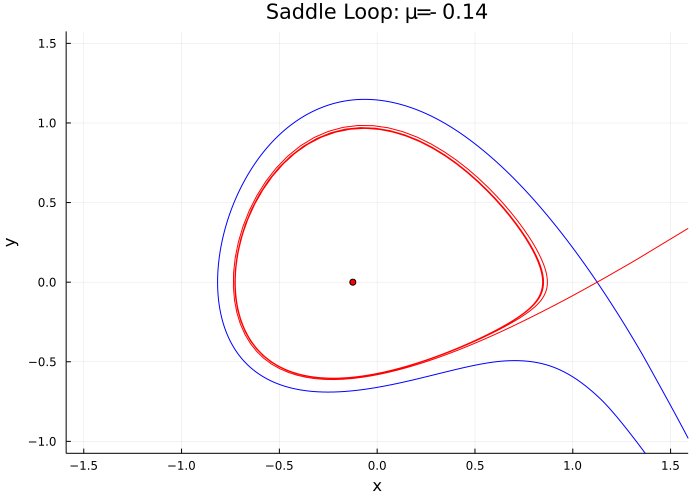

In [3]:
# Esto es interactivo en ipynb
#μ=-0.14
@manipulate throttle=0.5 for μ=-0.26:0.001:0.1
    u0_array=[[0.5-sqrt(0.25-μ);0.0],[0.5+sqrt(0.25-μ);0.0]]
    flux2d_manifolds(sloop!,sloop_jac,u0_array,[μ];
        tmax=300,delta=1e-6,xlims=[-1.5,1.5],ylims=[-1,1.5],title="Saddle Loop: \\mu="*string(μ))
end    

Podemos describir los cambios cualitativos del retrato de fases partiendo de un valor de $\mu>0$. En este caso tenemos el punto silla en el origen y un foco atractor a la izquierda. La variedad estable rodea en un lazo  abierto el atractor delimitando su cuenca de atracción, la rama derecha de la variedad inestable diverge y la rama izquierda alimenta el atractor. 

Cuando cruzamos $\mu=0$ hacia los negativos el foco pierde estabilidad, se produce una bifurcación de Hopf y emite un ciclo límite atractor. Para valores de $\mu$ ligeramente menores a 0 la rama izquierda de la variedad inestable del saddle alimenta ahora al ciclo límite estable por fuera (por dentro es alimentado por el repulsor). 

Lo interesante es que a medida que $\mu$ sigue bajando el ciclo límite sigue creciendo (al principio de forma proporcional a $\sqrt{-\mu}$) y acercándose a la variedad estable que lo rodea y al punto silla. Cuando $\mu \approx -0.21$ (ver) la rama izquierda de la variedad inestable y el ciclo límite atractor están ambos practicamente pegados a la rama izquierda de la variedad estable. 

Cuando $\mu$ es aproximadamente igual a -0.125 (ver) el ciclo límite colisiona con el punto silla (su período se hace infinito) y **las ramas izquierdas de las variedades estable e inestable del saddle se fusionan** formando un loop (de ahi el nombre), lo que se conoce también como una conexión **homoclínica**.

Para valores de $\mu$ menores las ramas de las variedades estan cruzadas como si hubiesen pasado una a traves de la otra. En efecto, antes la variedad inestable estaba dentro, rodeada por la estable y ahora la variedad estable esta adentro (y de hecho es alimentada por el foco repulsor que antes alimentaba al ciclo límite que ya no está) y la variedad inestable la rodea por fuera. Se trata sin duda de un flujo que es topológicamente distinto de un lado y del otro de $\mu \approx -0.215$, por lo tanto en ese punto se produjo una bifurcación que no puede reducirse al estudio de la estabilidad de puntos fijos. Esta es la **bifurcación homoclínica** o **saddle loop**.

Otra forma de describir esta bifurcación es para valores de $\mu$ crecientes. En ese caso es la variedad inestable que se va pegando cada vez más a la estable desde afuera hasta formar un saddle loop en la bifurcación. Ahora bien, visto desde este punto de vista (viniendo desde $\mu<-0.215$) podemos considerar que la bifurcación homoclínica da nacimiento a un ciclo límite estable con período infinito (sobre la bifurcación) que va achicándose hasta colapsar con el repulsor en $\mu=0$ y dar origen a un foco atractor (es una bifurcación de Hopf que sigue siendo supercrítica pero contada al revés). 

Es decir, que a diferencia de los ciclos límites que se originan en una Hopf, los ciclos límites que nacen de una conexión homoclínica aparecen con período infinito y con una amplitud fija (el tamaño del saddle loop). 

Además de esta doble diferencia con la Hopf, las oscilaciones que se aproximan a su aniquilación con un saddle loop (o "nacen de el" segun como lo veamos) tienen una característica similares al fenómeno de Critical Slowing Down. La parte de la órbita que se está cerca del saddle es muy angulada y se enlentece. 

Por qué hacemos énfasis en esta diferencia? Porque  a diferencia de las oscilaciones que nacen de una Hopf que son suaves y bastante sinusoidales (al menos al prinicpio muy cerca de la bifurcación), las del saddle loop nacen como con una forma característica de picos. Una última observación que luego nos va a servir para distinguir esta bifurcación de otra global es que si bien en teoría el período tiene a infinito a medida que nos acercamos a la bifurcación lo hace de una forma muy lenta.

Esto se puede explorar en el gráfico de abajo, donde el período varía aproximadamente entre 8 y 15 a pesar de que nos acercamos bastante a la bifurcación.

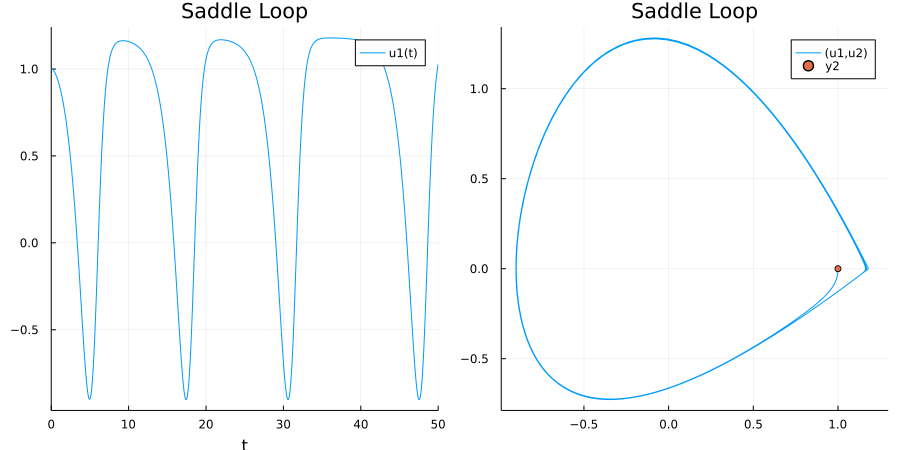

In [11]:
# Esto es interactivo en ipynb
#tmax=50.0;μ=-0.213
@manipulate throttle=.05 for tmax=10.0:10.0:60,μ=-0.215:0.0001:-0.15
    prob = ODEProblem(sloop!, [1.0; 0.0], (0, tmax), [μ])
    sol = solve(prob);
    p1 = plot(sol,vars=(0,1))
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="Saddle Loop",fmt=:png)
end

## Bifurcaciones en Ciclos Límites

## Saddle Node Heteroclínica (SNH)

Vamos a considerar el siguiente sistema:

$\dot{x} = y$

$\dot{y} = \mu+ x^2 -xy - x^3 -x^2y$ 

que no es el mas simple que presenta esta bifurcación pero nos va a servir luego. El cálculo de los puntos fijos se dificulta porque hay que resolver:

$f(x)=\mu+x^2-x^3=0$

que por supuesto se puede hacer numericamente. 

Pero, sin necesidad de saber la posición de los puntos fijos con exactitud, podemos saber que al variar $\mu$ vamos a cruzar dos bifurcaciones de saddle node. En efecto, la cúbica es de tipo "N" porque los términos cuadrático y cúbico tienen distinto signo y podemos calcular mas facilmente el pico y el valle de esta "N" cubica porque esto va a suceder cuando su derivada sea cero, es decir para los dos puntos que cumplen: $x(2-3x)=0$. En un gráfico de $f(x)$ esos puntos van a a estar en $(0,\mu)$ y en $(2/3,\mu+4/27)$. Es decir que dibujando a mano la cubica va a tener este aspecto

<div>
<img src="../files/sniper1.png" width="400px">
</div>

El cambio de tener tres a un punto fijo va a suceder cuando $\mu=0$ y cuando $\mu=-4/27\approx -0.148$. Nos interesa este ultimo caso:

<div>
<img src="../files/sniper2.png" width="400px">
</div>

Donde deberia producirse una bifurcación de nodo silla en $x=2/3$ $y=0$. Queda como tarea ver que el Jacobiano tiene como determinante en los puntos fijos $\Delta=x(2-3x)$ que se anula para $x=2/3$.

Sin embargo hay una característica global del flujo que no se captura con la linealización como se puede ver en el gráfico de abajo donde barremos el parámetro en un entorno de la bifurcación de nodo silla que se produce para $\mu=-4/27$.

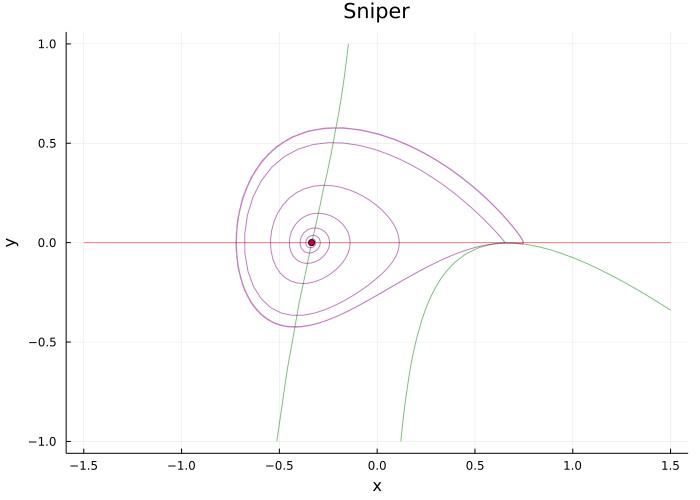

In [5]:
function sniper!(du,u,p,t)
    du[1]=u[2]
    du[2]=p[1]+u[1]*(-u[2]+u[1]*(1-u[1]-u[2]))
    du
end    

#esto es interactivo en ipynb
#μ=-0.15
manipulate throttle=0.5 for μ=-0.16:0.001:-0.14
    phase_portrait(sniper!,[μ];tmax=200,delta=1e-6,xlims=[-1.5,1.5],title="Sniper")
end    

Si partimos con el slider desde la izquierda para un valor $\mu<4/27$ vemos que hay un solo punto fijo repulsor que alimenta un ciclo límite atractor, que circula en sentido horario como lo indica el sentido de la espiral. 

La forma del ciclo límite es bastante particular porque tiene un "pico" hacia la izquierda. Este pico se puede explicar por la aparición de la rama curvada de la nulclina de $\dot{y}=0$ (en verde). En efecto la trayectoria que cruza verticalmente la nulclina roja desde arriba no puede cruzar la nulclina verde y se desplaza hacia la izquierda muy pergada a esa curva. En esa zona el flujo se enlentece por la proximidad de la saddle node (como vamos a ver de una forma mucho más dramática que en el saddle loop). 

A medida que $\mu$ se va acercando a la bifurcación desde abajo la nulclina verde se acerca más a la roja hasta que para $\mu<4/27$ la toca tangencialmente y se produce una bifurcación de nodo silla. Pero la particularidad de esta bifurcación es que la creación de los dos puntos fijos se produce **sobre el ciclo límite atractor**. Esto tiene que ser asi porque la trayectoria del ciclo límite en esa parte inferior del pico queda atrapada entre las dos nulclinas. 


Como consecuencia **el ciclo límite atractor desaparece** y se forma una **conexión heteroclínica** entre los dos puntos fijos. Antes se llamaba "homoclinica" a la conexión entre las variedades de un mismo punto silla. Ahora tenemos la conexión entre la variedad inestable del punto silla y el punto fijo atractor. De hecho, como se puede ver para $\mu>4/27$ las dos ramas de la variedad inestable forman un lazo cerrado que rodean al repulsor que antes alimentaba al ciclo límite y ahora esta conectado con una de las ramas de la variedad estable del punto silla. A diferencia de la conexión homoclínica que solo ocurria en la bifurcación esta conexión heteroclinica es persistente, robusta y es una caracteristica global del flujo que no puede derivarse del análisis local del equilibrio.

Esta bifurcación se conoce como **saddle node sobre ciclo límite**, o **saddle node de periodo infinito** (Sniper por las siglas en inglés) o **saddle node con conexión heteroclínica (SNH)**.

Al igual que en el caso anterior es instructivo también pensar la bifurcación en el sentido inverso. Para valores $\mu>4/27$ tenemos un punto silla cuyas variedades inestables alimentan un nodo atractor (conexión hetetroclínica). Esta conexión heteroclínica forma un lazo cerrado que divide el flujo de adentro del de afuera, pero en este caso hay un único atractor (el nodo) que es alimentado desde afuera porque el flujo es globalmente atractor y tiene que estar alimentado desde adentro por algún conjunto repulsor (punto fijo o ciclo límite inestable). 

A medida que nos vamos acercando a la bifurcación desde arriba el punto silla y el nodo se van aproximando y cuando colapsan el lazo cerrado de la conexión heteroclínica se cierra con un punto de estabilidad marginal en ($x=2/3$,$y=0$) formando una órbita cerrada con período infinito. Esa órbita además es atractora desde adentro debido al repulsor y desde afuera porque estaba embebida en la cuenca de atracción del nodo. Para $\mu<4/27$ se transforma en un ciclo límite atractor. 

Al igual que la bifurcación de saddle loop esta bifurcación da origen a un ciclo límite de amplitud definida (el tamaño del lazo heteroclínico) y período infinito. Sin embargo se puede diferenciar de la anterior debido a que el aumento del período cerca de la bifurcación escala mucho más rápido, como se puede apreciar en el gráfico de abajo. 

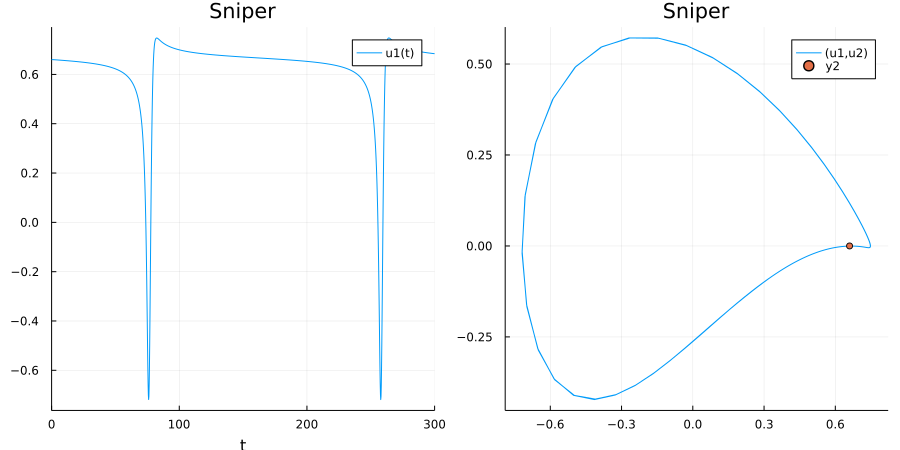

In [16]:
#esto es interactivo en ipynb
#tmax=300.0;μ=-0.1485
@manipulate throttle=.05 for tmax=10.0:10.0:500, μ=-0.16:0.0001:-0.1482
    prob = ODEProblem(sniper!, [0.66; 0.0], (0, tmax), [μ])
    sol = solve(prob);
    p1 = plot(sol,vars=(0,1))
    p2 = plot(sol,vars=(1,2))
    scatter!(p2,[prob.u0[1]],[prob.u0[2]])
    plot(p1,p2,layout=(1,2),size=(900,450),title="Sniper",fmt=:png)
end

Se puede mostrar que el frecuencia tiende a cero y escala cerca de la bifurcación como la raíz cuadrada del parámetro, es decir que crece como una ley de potencia. 

## Bifurcaciones en Ciclos Límites
## Nodo silla de ciclos límites

La ultima bifurcación global que da lugar a autooscilaciones que vamos a ver es el equivalente de la bifurcación de atractor repulsor para puntos fijos en 1D pero para ciclos límites. 

Cuando veamos sistemas forzados vamos a definir más formalmente una sección  de Poincaré, pero por ahora vamos a imaginarnos que tomamos un segmento $\Pi$ como se ve en la figura en verde, que es cortado por una trayectoria espiral en azul que va hacia un atractor $S$ varias veces en los puntos $s_1$, $s_2$, $s_3$, ...etc. Podemos representar esto como un mapa 1D sobre $\Pi$ que evoluciona en el sentido de la flecha verde (recordar que un mapa es un sistema dinámico pero con tiempo discreto). En verdad si bien no hay un flujo, todos los puntos que se obtienen de las trayectorias que cortan $\Pi$ evolucionan en el sentido de la flecha verde. 

<div>
<img src="../files/poincare2d.png" width="400px">
</div>

Por otra parte si en lugar de una espiral atractora hubiesemos seccionado una repulsora la flecha verde apuntaría para afuera, y si tuviésemos una órbita cerrada eso correspondería a un punto fijo en $\Pi$, es decir a un punto que evoluciona (se mapea) sobre si mismo.

Vamos a imaginarnos ahora que tomamos una sección $\Pi$ pero en un entorno de un ciclo límite estable $C$. El ciclo límite es una trayectoria cerrada por lo tanto corresponde a un punto fijo $c$ en la sección $\Pi$. Pero además ese punto fijo es atractor porque las trayectorias que estan por fuera, por ejemplo $S$, convergen hacia el (puntos $s_1$, $s_2$, $s_3$, ... etc) y las trayectorias que estan cerca (por ejemplo $Z$) también.

<div>
<img src="../files/poincare2dciclo.png" width="400px">
</div>

Es decir que en un entorno de órbitas periódicas o ciclos límites (o incluso espirales) podemos tener una representación unidimensional en la forma de un mapa. 

Finalmente, como se trata de un sistema no lineal nos podemos preguntar que sucede con posibles cambios de estabilidad de los puntos fijos en la sección $\Pi$. El cambio cualitativo genérico en sistemas 1D es la bifurcación de atractor-repulsor. En la secuencia de abajo se muestra la consecuencia de tener una bifurcación de repulsor/atractor sobre la sección $\Pi$.

<div>
<img src="../files/saddlenodeCL.png" width="800px">
</div>

A la izquierda tenemos una espiral atractora, no hay puntos fijos sobre $\Pi$, pero se forma una zona $S$ donde el radio de la espiral no decrece tan de prisa como en otras zonas, es decir que la evolución sobre $\Pi$ se enlentece en esa zona (no el flujo sobre las órbitas). Ese enlentecimiento anuncia la proximidad de una bifurcacion de atractor-repulsor en ese punto de $\Pi$. Cuando se produce la bifurcación se crean un par puntos fijos ($A$ y $R$) sobre la sección, que se corresponden con un par de ciclos límites en el flujo total: uno atractor (CA) por fuera que sigue atrayendo el flujo global y un repulsor por dentro (CR) que sigue alimentando hacia adentro. A su vez entre ambos ciclos límites el flujo circula en una espiral creciente desde el repulsor hacia el atractor. Si bien esta es una bifurcación local en la sección $\Pi$ en el flujo es una bifurcación global.

Como podemos obtener una saddle-node de ciclos límites? 

Un sistema simple podría pensarse en coordenadas polares, con la dinámica ocurriendo sólo en $\rho$. Como habíamos visto en ese caso:

$\dot{x} = -\omega y + x \left(\dot{\rho}/\rho\right)$

$\dot{y} = \omega x + y \left(\dot{\rho}/\rho\right)$

Podemos entonces simplemente elegir una ecuación para $\dot{\rho}$ que tenga una saddle-node y podriamos estar tentados de usar la forma normal. El problema es que la saddle node no puede estar en el origen, y aun cuando desplacemos la saddle node por ejemplo haciendo $\dot{\rho}=a-(\rho-1)^2$ al reemplazar en la expresión anterior nos van a quedar términos con $1/\rho$ que divergen en el origen. Necesitamos tener entonces un sistema 1D simple para $\rho$ que tenga la misma simetría que la pitchfork pero que además tenga una saddle node. 

Afortunadamente ese sistema existe y lo vimos como ejemplo de una pitchfork subcrítica más un término de orden 5 en un ejercicio y es el siguiente:

$\dot{\rho} = \beta\rho +\rho^3 - \rho^5$

Al reemplazar en la forma cartesiana nos queda algo bastante decente que se parece a la forma normal de la Hopf subcritica más términos de orden 5:

$\dot{x} = \beta x -\omega y + x \left(\rho^2-\rho^4\right)$

$\dot{y} = \omega x + \beta y + y \left(\rho^2-\rho^4\right)$

Escribimos nuestro sistema haciendo uso de la conversión a $\rho$ dentro de la funcion:

In [7]:
function snlc!(du,u,p,t)
    ρ = sqrt(u[1]^2+u[2]^2)
    (β,ω) = p
    du[1] = β*u[1]-ω*u[2]+u[1]*(ρ^2-ρ^4)
    du[2] = ω*u[1]+β*u[2]+u[2]*(ρ^2-ρ^4)
    du
end    

snlc! (generic function with 1 method)

Podemos trazar a mano un diagrama de bifurcaciones para $\rho$ como hicimos antes, ya que $\beta\rho +\rho^3 - \rho^5=0$ tiene además de la solucion en $\rho=0$ otras posibles dos soluciones que surgen de resolver la siguiente  cuadrática en la variable $\rho^2$: 

$\beta + (\rho^2) - (\rho^2)^2=0$

$\rightarrow \quad \rho = \frac{1}{\sqrt{2}}\sqrt{1\pm\sqrt{1+4\beta}}$

que va a tener dos soluciones sólo cuando $\beta>-1/4$. Es decir que la saddle node se va a producir en $\beta=-1/4$ y se van a crear una rama estable arriba (ya que el término con signo negativo $-\rho^5$ domina) e inestable abajo. Y esta rama inestable se va a juntar en $\beta=0$ con el equilibrio de $\rho=0$ que hasta entonces era atractor transformandolo en repulsor mediante una Hopf subcrítica. La saddle node $\beta=-1/4$ es obviamente ona saddle node de ciclos límites porque estamos describiendo la variable radial y la variable angular siempre sigue girando con frecuencia $\omega$. 

Vamos a hacer un grafico de todo esto para que quede más claro. Acá usamos una función del paquete del curso `realplot` que hace un plot de de la parte real de arrays complejos solo si son puramente reales (como no es una funcion exportada tenemos que invocarla con el alias del paquete que definimos al principio de la notebook)

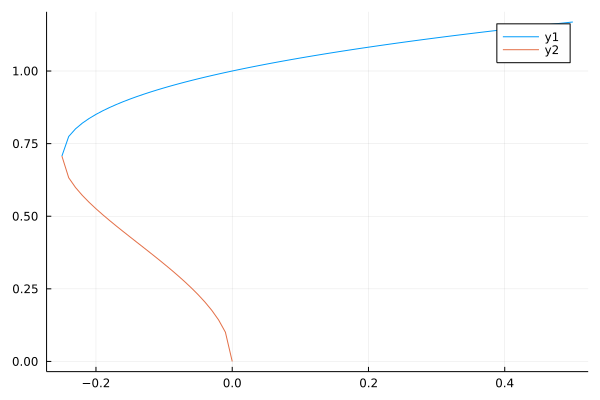

In [8]:
βlist = Complex.(-0.5:0.01:0.5)
ρ1 = @. 1/sqrt(2)*sqrt(1+sqrt(1+4*βlist))
ρ2 = @. 1/sqrt(2)*sqrt(1-sqrt(1+4*βlist))
nld.realplot(βlist,ρ1)
nld.realplot!(βlist,ρ2;fmt=:png)

No es necesario que grafiquemos la rama de $\rho=0$. Sabemos que va a ser un foco atractor para $\beta<0$ y repulsor para $\beta>0$ porque en un entorno de $\beta=0$ tenemos la forma normal de la Hopf (cerca de $\rho=0$ podemos despreciar los terminos de orden 5).

Pero lo que nos importa acá es la saddle node que ocurre para $\beta=-1/4$ en $\rho=1/sqrt{2}$. No es facil graficar el flujo y detectar un ciclo limite inestable por lo que elegimos las condiciones iniciales 

In [13]:
u0_arr=[[-1.0;0.0],[-0.707;0.0],[-0.55;0.0],[-0.5;0.0]]
function prob_func(prob,i,repeat)
  remake(prob,u0=u0_arr[i])
end
condition(u,t,integrator) = (u[1]*u[1]+u[2]*u[2]) > 4.5
affect!(integrator) = terminate!(integrator)

affect! (generic function with 1 method)

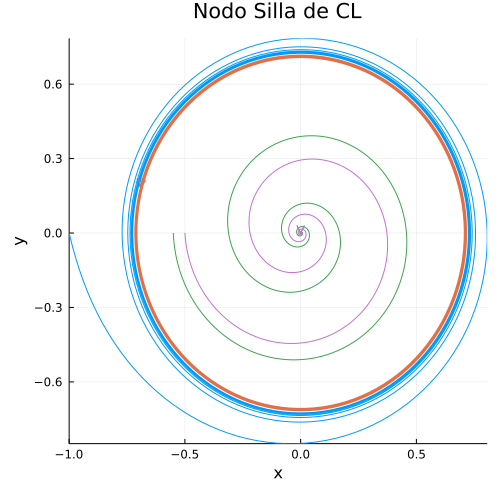

In [17]:
#esto es interactivo en ipynb
#tmax=50.0;β=-0.25
@manipulate throttle=.05 for tmax=10.0:1.0:50, β=-0.3:0.0001:-0.18
    prob = ODEProblem(snlc!, u0_arr[1], (tmax),[β,1.0])
    sol = solve(EnsembleProblem(prob,prob_func=prob_func),
        callback=DiscreteCallback(condition,affect!),
        EnsembleThreads(),trajectories=length(u0_arr))
    p1 = plot(sol,vars=(1,2),arrows=true;
        legend=false,xlabel="x",ylabel="y",size=(500,500),title="Nodo Silla de CL",fmt=:png)
    if β>-0.25
        ρcr = 1/sqrt(2)*sqrt(1-sqrt(1+4*β))
        plot!(p1,ρcr*cos.(0:pi/20:2*pi),ρcr*sin.(0:pi/20:2*pi),c=:black,linestyle=:dash)
    end
    p1
end

Notar por ejemplo como para $\beta=-0.3$ las 4 trayectorias convergen al foco atractor del origen pero a medida que se aproxima a la bifurcación se genera una zona de enlentecimiento alrededor de 0.7 (de hecho hay que extender el tmax para que llegue cerca del foco). Luego de la bifurcación agregamos el ciclo límite repulsor en línea punteada (ya que conocemos su radio) para entender mejor el flujo. 

De forma general es muy dificil detectar los cíclos límites inestables, sobre todo cuando están cerca de atractores. Sin embargo su rol es muy importante porque al igual que las variedades de los puntos silla y las conexiones hetero y homoclínicas organizan el flujo global. En sistemas de más dimensiones vamos a ver que su rol es esencial y está ligado a la aparición de caos.

Finalmente, si comparamos este ciclo límite estable con los originados con la otras bifurcaciones vemos que tiene en común con la Hopf que nace con una frecuencia definida, pero que al igual que la homoclínica y las SN en el cíclo limite nace con una amplitud finita.

## Resumen de bifurcaciones que dan origen a ciclos atractores y leyes escala

Tanto la bifurcación de Hopf supercrítica como las tres bifurcaciones globales que vimos dan origen a ciclos límites estables. Sin embargo las carcacterísticas de este cíclo límite cerca de la bifurcación en términos de su período (o frecuencia) y su amplitud, sobre todo en como éstas dependen de la distancia en el espacio de parámetros a la bifurcación permiten distinguir los cuatro casos. Esto esta sumarizado en la tabla siguiente donde suponemos que el sistema sufre la bifurcación a un valor de parámetro crítico $\mu_c$:

| Bifurcacion 	        | Periodo 	     | Amplitud 	|
|-------------------	|:--------------:|:----------:|
| Hopf 	                | definido 	| cero (3)	|
| Homoclinica 	        | $\infty$ (1)	| definida 	|
| SN Heteroclínica  	| $\infty$ (2) | definida 	|
| SN de CL 	            | definido 	| definida 	|

(1) $\sim\ln{(\mu-\mu_c)}$ 	
(2) $\sim1/\sqrt{(\mu-\mu_c)}$  	
(3) $\sim\sqrt{(\mu-\mu_c)}$